# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import glob
import csv
import re

def get_outputs(problem, algo):
    for i in glob.glob(f"output/{algo}/*.csv"):
        if "optimal" in i or "grid" in i:
            continue
        if problem in i:
            yield i

def get_09(problem,algo):
    return pd.read_csv(f"output/{algo}/{problem}_0.9.csv")

def last_rows(problem, algo):
    summary = []
    for i in get_outputs(problem,algo):
        gamma = i.split("_")[-1].replace(".csv","")
        df = pd.read_csv(i)
        df2 = df.iloc[[-1]]
        vals = df2.to_dict(orient="records")[0]
        vals['gamma'] = gamma
        summary.append(vals)
    df = pd.DataFrame(summary)
    df = df.sort_values(by=['gamma'])
    return df

def step_rewards(problem, algo):
    df = last_rows(problem, algo)
    print(problem)
    print(df)

#     print(df['gamma'].values)
    fig, ax1 = plt.subplots()
    ax1.plot(df['gamma'].values, df['steps'].values, label="Steps", color="C1")

    ax2 = ax1.twinx()
    ax2.plot(df['gamma'].values, df['reward'].values, label="Reward", color="C2")

    ax1.set_ylabel("Steps", color="C1")
    ax2.set_ylabel("Rewards", color="C2")
    plt.xlabel("Discount Factor")
    plt.title(problem+f"({algo})")
    plt.show()
    
    
def get_outputs_90(problem, algo):
    for i in glob.glob(f"output/{algo}/*.csv"):
        if "optimal" in i or "grid" in i:
            continue
        if problem+'_0.9' in i:
            yield i

# step_rewards("noslip_small_frozen_lake", "VI")
# step_rewards("noslip_large_frozen_lake", "VI")
# step_rewards("small_frozen_lake", "VI")

# step_rewards("large_frozen_lake", "VI")

large_frozen_lake
   converged         delta gamma    reward  steps      time
3       True  0.000000e+00   0.0 -6.333333      2  0.008073
2       True  1.537794e-07   0.1 -6.512202      6  0.013934
4       True  7.301478e-07   0.2 -6.718851      6  0.014820
5       True  1.928337e-06   0.3 -6.959761      6  0.015251
8       True  1.352810e-06   0.4 -7.244030      6  0.021578
9      False  1.795681e-06   0.5 -7.584836   1000  0.022855
7       True  1.946955e-06   0.6 -8.001777      8  0.029561
6      False  3.014594e-06   0.7 -8.524148   1000  0.037574
0       True  5.051653e-06   0.8 -9.185498      7  0.049118
1       True  8.586847e-06   0.9 -9.777463     13  0.083524


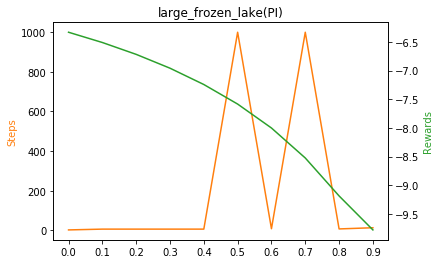

small_frozen_lake
   converged         delta gamma    reward  steps      time
6       True  0.000000e+00   0.0 -0.333333      2  0.000562
7       True  3.809826e-07   0.1 -0.333660      2  0.000875
5       True  3.016635e-07   0.2 -0.334396      2  0.001172
4       True  1.322633e-06   0.3 -0.334907      3  0.001303
1       True  1.461430e-06   0.4 -0.333848      2  0.001421
0       True  2.992219e-06   0.5 -0.328212      2  0.001721
2       True  3.173167e-06   0.6 -0.310622      2  0.002332
3       True  5.301363e-06   0.7 -0.260628      2  0.002746
9       True  5.632871e-06   0.8 -0.108047      2  0.004054
8       True  7.666419e-06   0.9  0.499716      2  0.006678


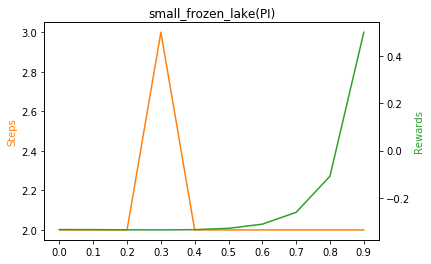

In [20]:
step_rewards("large_frozen_lake", "PI")
step_rewards("small_frozen_lake", "PI")

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

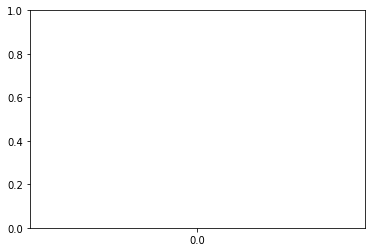

In [27]:
problem = "small_frozen_lake"
df_vi = last_rows(problem,"VI")
df_pi = last_rows(problem,"PI")

fig, ax1 = plt.subplots()
ax1.plot(df_pi['gamma'].values, df_vi['time'].values, label="PI Time", color="C1")

ax2 = ax1.twinx()
ax2.plot(df_vi['gamma'].values, df_vi['time'].values, label="VI Time", color="C2")

ax1.set_ylabel("Steps", color="C1")
ax2.set_ylabel("Time", color="C2")
plt.xlabel("Discount Factor")
plt.title(problem)
plt.show()

In [29]:
problem = "small_frozen_lake"
df_vi = get_09(problem,"VI")
df_pi = get_09(problem,"PI")

print(df_vi['time'].sum())
print(df_pi['time'].sum())

0.010826000000003333
0.010438000000000613
